In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons

In [84]:
X, y = make_moons(n_samples=500, noise=0.1)

In [85]:
X[:10]

array([[ 1.82193283, -0.09267394],
       [ 1.52544953, -0.16393789],
       [ 0.19737147, -0.15441543],
       [ 0.32277727,  0.04608324],
       [ 1.98202343,  0.50890232],
       [ 1.46617233, -0.34321644],
       [ 0.06626402,  0.05411404],
       [ 1.68720608, -0.12369099],
       [-0.9649442 , -0.02938111],
       [-0.07240629,  0.98151532]])

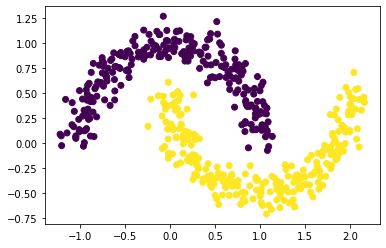

In [86]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [87]:
def plot_boundary(predict):
  x1 = np.arange(min(X[:,0]) - 1, max(X[:,0]) + 1, step=0.01)
  x2 = np.arange(min(X[:,1]) - 1, max(X[:,1]) + 1, step=0.01)

  xx, yy = np.meshgrid(x1, x2)
  # xx, yy = np.meshgrid(X[:,0], X[:,1])
  arr = np.array([xx.flatten(), yy.flatten()]).T
  print(arr.shape)
  z = predict(arr)
  print(z.shape)
  z = z.reshape(xx.shape)
  print(z.shape)
  plt.contourf(xx, yy, z, cmap=ListedColormap(('gray','red')))
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.show()

In [88]:
logistic = LogisticRegression()
logistic.fit(X, y)

LogisticRegression()

(214522, 2)
(214522,)
(398, 539)


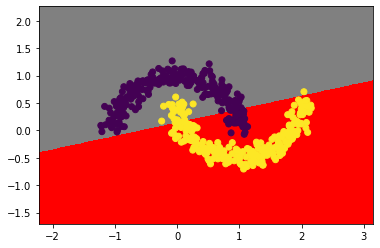

In [89]:
plot_boundary(lambda x : logistic.predict(x))

In [90]:
y_pred = logistic.predict(X)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y,y_pred)

0.878

In [93]:
svc = SVC()
svc.fit(X, y)

SVC()

(214522, 2)
(214522,)
(398, 539)


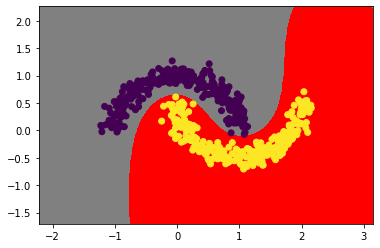

In [94]:
plot_boundary(lambda x : svc.predict(x))

In [95]:
y_pred = svc.predict(X)
accuracy_score(y,y_pred)

1.0

In [96]:
n = len(X)
input_neurons = 2
output_neurons = 2
alpha = 0.01

In [97]:
def predict(model, x):
  wh = model['wh']
  wout = model['wout']
  bh = model['bh']
  bout = model['bout']
  
  z1 =  np.dot(x, wh) + bh
  hiddenLayer = np.tanh(z1)
  z2 = np.dot(hiddenLayer, wout) + bout
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

  return np.argmax(probs, axis=1)

In [98]:
def buildModel(input_neurons, hidden_neurons, epochs, alpha):
  wh = np.random.uniform(size=(input_neurons, hidden_neurons))
  wout = np.random.uniform(size=(hidden_neurons, output_neurons))
  bh = np.random.uniform(size=(1, hidden_neurons))
  bout = np.random.uniform(size=(1, output_neurons))

  model = {}

  for i in range(epochs):
    # Feedforward
    z1 =  np.dot(X, wh) + bh
    # Using tanh on hidden layer
    hiddenLayer = np.tanh(z1)
    z2 = np.dot(hiddenLayer, wout) + bout
    # Using softmax on output layer
    exp_scores = np.exp(z2)
    # axis = 1, do sum row wise
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Backpropagation
    delta = probs
    delta[range(n), y] -= 1

    error_hidden = delta.dot(wout.T)
    slope_hidden = 1 - np.power(hiddenLayer, 2)
    delta_hidden = error_hidden * slope_hidden

    # Optimization
    wout = wout - hiddenLayer.T.dot(delta) * alpha
    wh = wh -  X.T.dot(delta_hidden) * alpha
    bout = bout - np.sum(delta, axis=0, keepdims=True) * alpha
    bh = bh - np.sum(delta_hidden, axis=0, keepdims=True) * alpha

    model = {'wh' : wh, 'wout' : wout, 'bh' : bh, 'bout' : bout}

  return model

In [109]:
hidden_neurons = 6
epochs = 100
model = buildModel(input_neurons, hidden_neurons, epochs, alpha)

(214522, 2)
(214522,)
(398, 539)


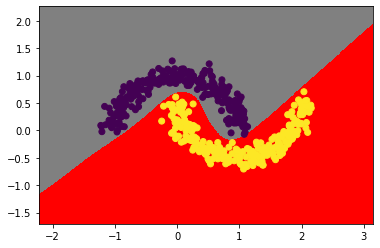

In [110]:
plot_boundary(lambda x : predict(model, x))

In [66]:
predict(model, X).shape

(500,)